In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

In [2]:
gal_files = ['galaxyData/galpos00.dat','galaxyData/galpos10.dat','galaxyData/galpos20.dat',
            'galaxyData/galpos30.dat','galaxyData/galpos40.dat','galaxyData/galpos50.dat',
            'galaxyData/galpos60.dat','galaxyData/galpos70.dat','galaxyData/galpos80.dat',
            'galaxyData/galpos90.dat']
pol_files = ['galaxyData/calib_pole.dat']
vlsr = [10.48,9.86,8.96,7.77,6.33,4.70,2.93,1.07,-0.82,-2.68]
vgsr_sun = 220  # km/s
gal_dis_sun = 8.5  # kpc
c = 29979245800  # cm/s
mu_0 = 29979245800/21.10611405413*10**-6    # MHz

In [3]:
gal_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans


for gal_file in gal_files: #Pull each individual filename from the list of azimuth files
    
    with open(gal_file) as gal_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        row_count = 0
        for j, row in enumerate(gal_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                row_count += 1
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec)/row_count # Add the data from the current row to your total spectral data for this file.
            
        gal_spectra.append(tot_spectrum)
        

In [4]:
pol_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans


for pol_file in pol_files: #Pull each individual filename from the list of azimuth files
    
    with open(pol_file) as pol_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        row_count = 0
        for j, row in enumerate(pol_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                row_count += 1
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec)/row_count # Add the data from the current row to your total spectral data for this file.
            
        pol_spectra.append(tot_spectrum)
        

In [5]:
# Calibrate for the galactic pole background
gal_spectra_cal = list(np.zeros(len(gal_spectra)))
for i in range(len(gal_spectra)):
    gal_spectra_cal[i] = gal_spectra[i] - pol_spectra[0]

In [6]:
print(np.shape(gal_spectra),np.shape(pol_spectra),np.shape(gal_spectra_cal))


(10, 1024) (1, 1024) (10, 1024)


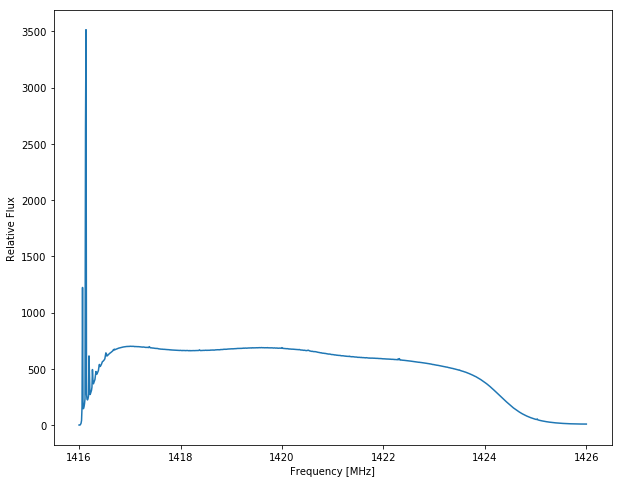

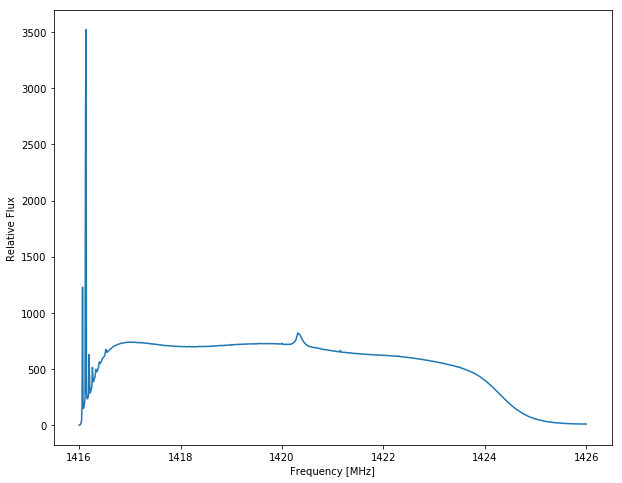

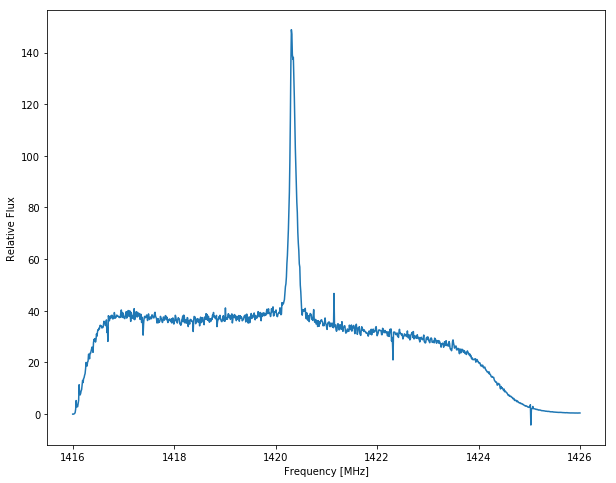

In [8]:
freq = np.linspace(1416,1426,1024)

plt.figure(figsize=[10,8])
plt.plot(freq,pol_spectra[0])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Relative Flux')
plt.show()


plt.figure(figsize=[10,8])
for i in range(1):
    plt.plot(freq,gal_spectra[i])
#     plt.plot(freq[100:750],el_spectra[10][100:750])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Relative Flux')
plt.show()

plt.figure(figsize=[10,8])
for i in range(1):
    plt.plot(freq,gal_spectra_cal[i])
#     plt.plot(freq[100:750],el_spectra[10][100:750])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Relative Flux')
plt.show()

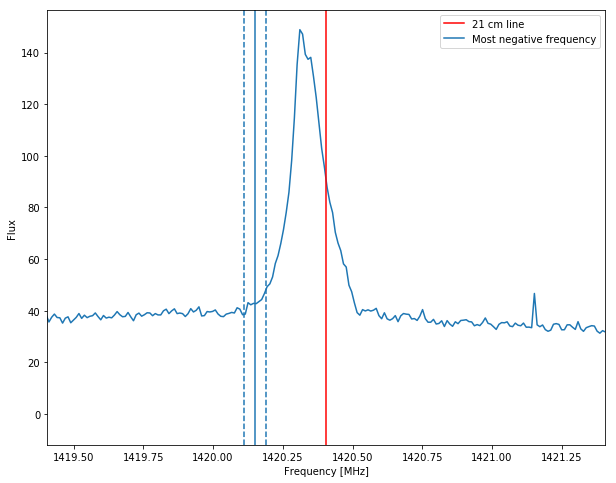

In [11]:
# 0 longitude
line0 = 1420.15
error0 = 0.04

plt.figure(figsize=[10,8])
plt.plot(freq,gal_spectra_cal[0])
plt.xlim([mu_0-1,mu_0+1])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.axvline(mu_0,color='r',label='21 cm line')
plt.axvline(line0,label='Most negative frequency')
plt.axvline(line0+error0,linestyle='--')
plt.axvline(line0-error0,linestyle='--')
plt.legend()
plt.show()

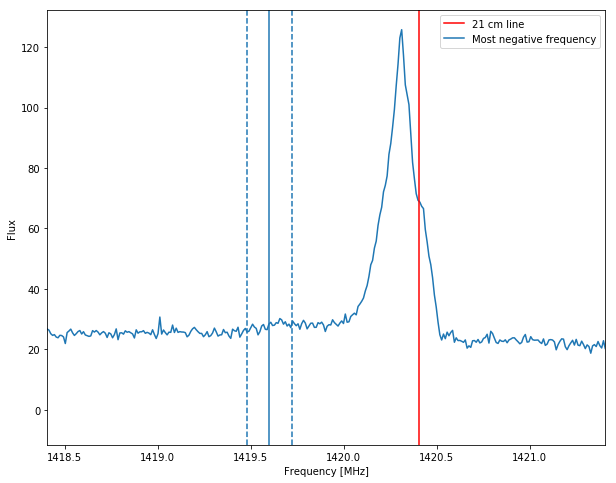

In [13]:
# 10 longitude
line1 = 1419.6
error1 = 0.12

plt.figure(figsize=[10,8])
plt.plot(freq,gal_spectra_cal[1])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.xlim([mu_0-2,mu_0+1])
plt.axvline(mu_0,color='r',label='21 cm line')
plt.axvline(line1,label='Most negative frequency')
plt.axvline(line1+error1,linestyle='--')
plt.axvline(line1-error1,linestyle='--')
plt.legend()
plt.show()

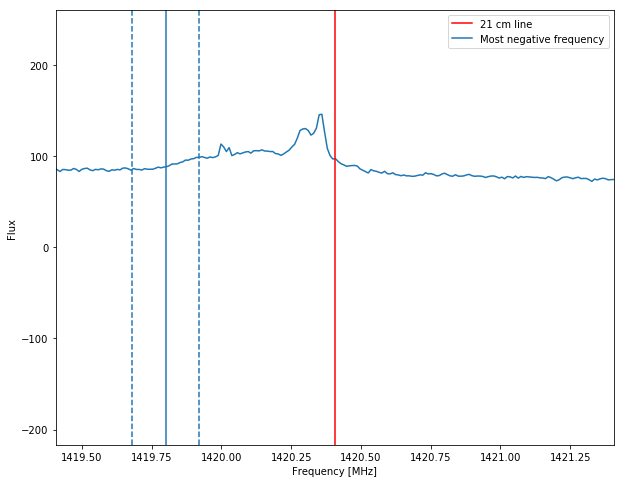

In [14]:
# 20 longitude
line2 = 1419.8
error2 = 0.12

plt.figure(figsize=[10,8])
plt.plot(freq,gal_spectra_cal[2])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.xlim([mu_0-1,mu_0+1])
plt.axvline(mu_0,color='r',label='21 cm line')
plt.axvline(line2,label='Most negative frequency')
plt.axvline(line2+error2,linestyle='--')
plt.axvline(line2-error2,linestyle='--')
plt.legend()
plt.show()

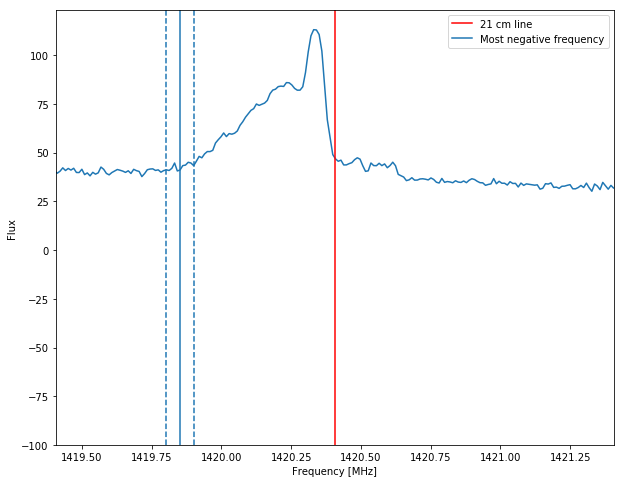

In [15]:
# 30 longitude
line3 = 1419.85
error3 = 0.05

plt.figure(figsize=[10,8])
plt.plot(freq,gal_spectra_cal[3])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.xlim([mu_0-1,mu_0+1])
plt.axvline(mu_0,color='r',label='21 cm line')
plt.axvline(line3,label='Most negative frequency')
plt.axvline(line3+error3,linestyle='--')
plt.axvline(line3-error3,linestyle='--')
plt.legend()
plt.show()

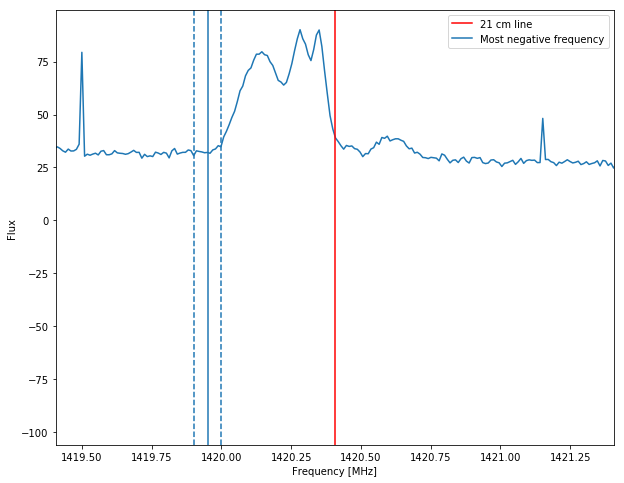

In [16]:
# 40 longitude
line4 = 1419.95
error4 = 0.05

plt.figure(figsize=[10,8])
plt.plot(freq,gal_spectra_cal[4])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.xlim([mu_0-1,mu_0+1])
plt.axvline(mu_0,color='r',label='21 cm line')
plt.axvline(line4,label='Most negative frequency')
plt.axvline(line4+error4,linestyle='--')
plt.axvline(line4-error4,linestyle='--')
plt.legend()
plt.show()

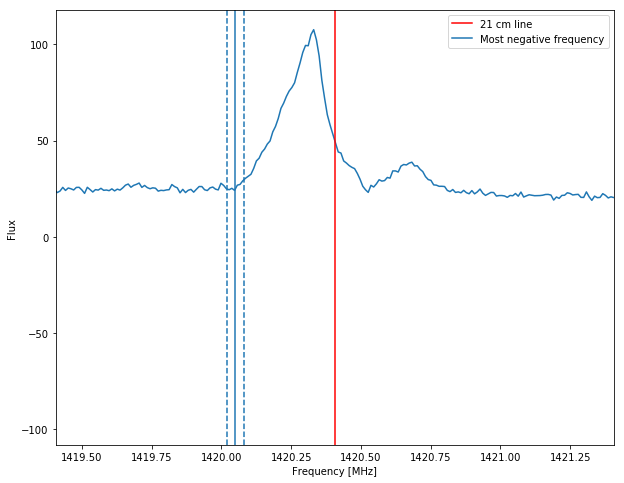

In [17]:
# 50 longitude
line5 = 1420.05
error5 = 0.03

plt.figure(figsize=[10,8])
plt.plot(freq,gal_spectra_cal[5])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.xlim([mu_0-1,mu_0+1])
plt.axvline(mu_0,color='r',label='21 cm line')
plt.axvline(line5,label='Most negative frequency')
plt.axvline(line5+error5,linestyle='--')
plt.axvline(line5-error5,linestyle='--')
plt.legend()
plt.show()

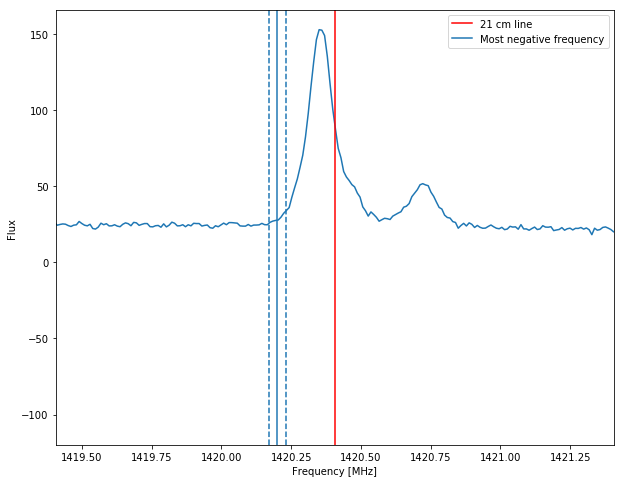

In [18]:
# 60 longitude
line6 = 1420.2
error6 = 0.03

plt.figure(figsize=[10,8])
plt.plot(freq,gal_spectra_cal[6])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.xlim([mu_0-1,mu_0+1])
plt.axvline(mu_0,color='r',label='21 cm line')
plt.axvline(line6,label='Most negative frequency')
plt.axvline(line6+error6,linestyle='--')
plt.axvline(line6-error6,linestyle='--')
plt.legend()
plt.show()

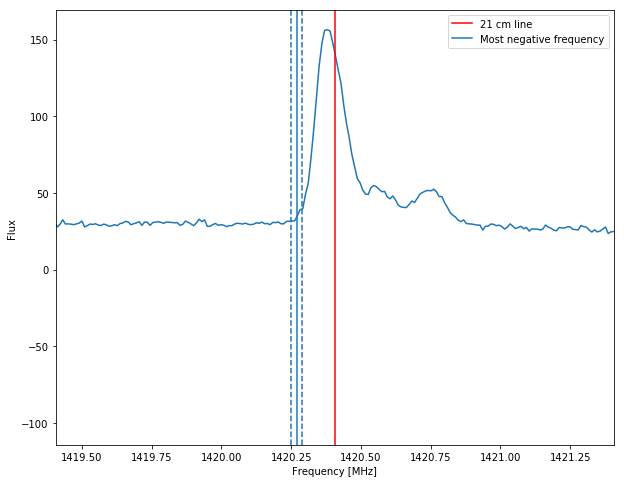

In [19]:
# 70 longitude
line7 = 1420.27
error7 = 0.02

plt.figure(figsize=[10,8])
plt.plot(freq,gal_spectra_cal[7])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.xlim([mu_0-1,mu_0+1])
plt.axvline(mu_0,color='r',label='21 cm line')
plt.axvline(line7,label='Most negative frequency')
plt.axvline(line7+error7,linestyle='--')
plt.axvline(line7-error7,linestyle='--')
plt.legend()
plt.show()

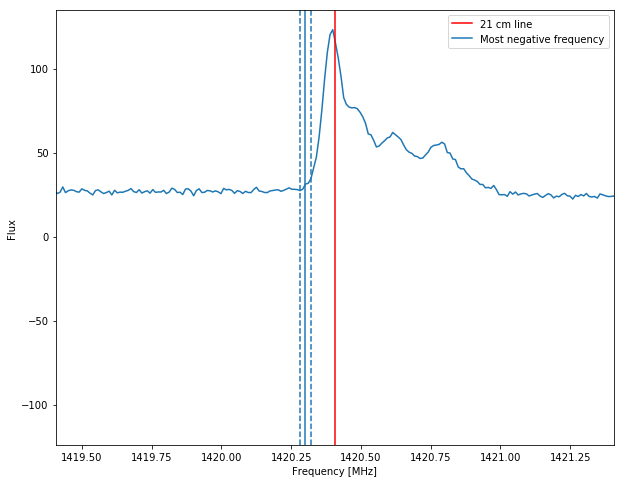

In [20]:
# 80 longitude
line8 = 1420.3
error8 = 0.02

plt.figure(figsize=[10,8])
plt.plot(freq,gal_spectra_cal[8])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.xlim([mu_0-1,mu_0+1])
plt.axvline(mu_0,color='r',label='21 cm line')
plt.axvline(line8,label='Most negative frequency')
plt.axvline(line8+error8,linestyle='--')
plt.axvline(line8-error8,linestyle='--')
plt.legend()
plt.show()

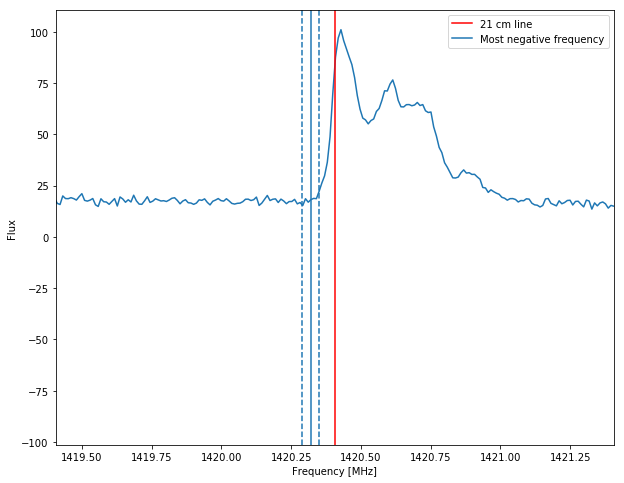

In [21]:
# 90 longitude
line9 = 1420.32
error9 = 0.03

plt.figure(figsize=[10,8])
plt.plot(freq,gal_spectra_cal[9])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.xlim([mu_0-1,mu_0+1])
plt.axvline(mu_0,color='r',label='21 cm line')
plt.axvline(line9,label='Most negative frequency')
plt.axvline(line9+error9,linestyle='--')
plt.axvline(line9-error9,linestyle='--')
plt.legend()
plt.show()

In [22]:
freq_mhz_app = np.array([line0,line1,line2,line3,line4,line5,line6,line7,line8,line9])
freq_mhz_app_err = np.array([line0+error0,line1+error1,line2+error2,line3+error3,line4+error4
                             ,line5+error5,line6+error6,line7+error7,line8+error8,line9+error9])
v_r = c*(1-freq_mhz_app/mu_0)/10**5  # km/s
v_r_err = c*(1-freq_mhz_app_err/mu_0)/10**5  # km/s
l = np.array([0,10,20,30,40,50,60,70,80,90]) #degree

In [23]:
print(freq_mhz_app)
print(v_r)
print(v_r_err)

[ 1420.15  1419.6   1419.8   1419.85  1419.95  1420.05  1420.2   1420.27
  1420.3   1420.32]
[  53.97926027  170.06288757  127.85065946  117.29760244   96.19148838
   75.08537433   43.42620325   28.65192341   22.32008919   18.09886638]
[  45.53681465  144.73555071  102.5233226   106.74454541   85.63843135
   68.75354011   37.09436903   24.4307006    18.09886638   11.76703216]


In [24]:
vgsr = v_r + vgsr_sun*np.sin(l*np.pi/180) + vlsr  #km/s corrected for local stamdard of rest
vgsr_err = v_r_err + vgsr_sun*np.sin(l*np.pi/180) + vlsr  #km/s corrected for local stamdard of rest
vgsr_err = np.abs(vgsr_err-vgsr)
galac_dis = gal_dis_sun*np.sin(l*np.pi/180) #kpc

In [25]:
print(vgsr)
print(vgsr_err)
print(galac_dis)

[  64.45926027  218.12548666  212.05509099  235.06760244  243.93476251
  248.31515181  236.88179208  236.45429998  238.15779485  235.41886638]
[  8.44244562  25.32733686  25.32733686  10.55305703  10.55305703
   6.33183422   6.33183422   4.22122281   4.22122281   6.33183422]
[ 0.          1.47600951  2.90717122  4.25        5.46369468  6.51137777
  7.36121593  7.98738728  8.3708659   8.5       ]


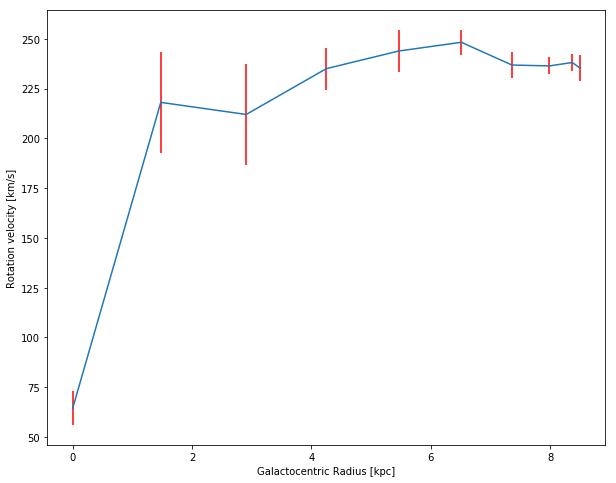

In [132]:
# Plot galactic rotation curve
plt.figure(figsize=[10,8])
plt.errorbar(galac_dis,vgsr,vgsr_err,ecolor='r')
plt.xlabel('Galactocentric Radius [kpc]')
plt.ylabel('Rotation velocity [km/s]')
plt.show()